In [191]:
import pandas as pd
import numpy as np
import scipy.signal
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [192]:
# Create sudo data

t=np.arange(0,200)

In [225]:
fs=0.333
time_series=0.0008*t**2*np.sin(2*np.pi*fs*t)-0.001*(0.9*t-50)**2+1

time_series.shape

time_series[0:26]=0 # Heading zeros

time_series[50:70]=time_series[50:70]*0.1+1+0.02*t[50:70] # Middle bit
time_series[100:125]=1 # Middle bit
time_series=time_series-time_series.min()+5
time_series[180:]=0


Text(0.5, 1.0, 'Time series with trend removed')

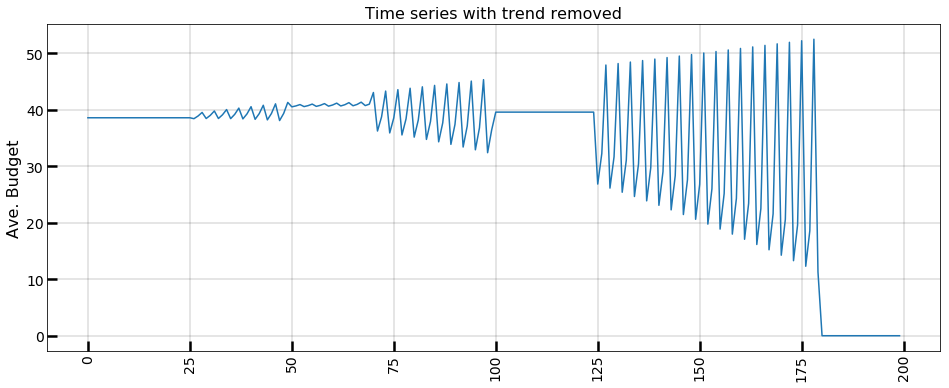

In [226]:
plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t,time_series)
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)


In [227]:
time_series=time_series.reshape(1,-1)

# Remove heading zeros
index=(time_series != 0).argmax()
time_series=time_series[0][index:].reshape(1,-1)

In [228]:
def ma(array, window=1):  # Moving average
     return np.convolve(array[0], np.ones((1,window))[0]/window, mode='same').reshape(1,array.shape[1])

In [229]:
mov_avg=ma(time_series, window=12)
time_series=time_series-ma(time_series, window=4)
nfft=1<<(time_series.shape[1]-1).bit_length()
freq_ts=(np.linspace(0,nfft/2,int(nfft/2)) *1/float(nfft))
freq_ts=freq_ts.reshape(1,-1).T


# Perform FFT
y=np.fft.fft(time_series, n=nfft)
y=abs(y**2) # Get the power spectrum

# Scale (optional)
y=(y-y.min())
y=y/y.max()

# Reshaping because Python is stupid and doesn't take care of this 
# automatically. Boy I miss Matlab.
y=y[0][0:int(nfft/2)].reshape(1,-1).T

period=math.ceil((1/freq_ts[ np.argmax(y) ])[0])

print( period )

3


Text(0.5, 1.0, 'Time series with trend removed')

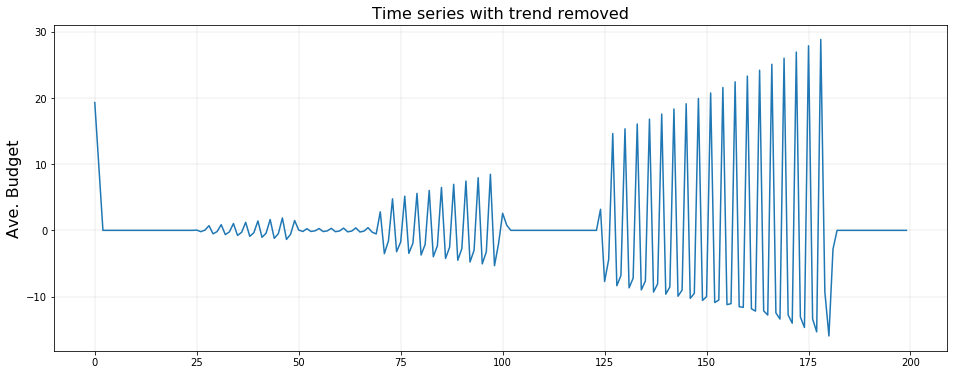

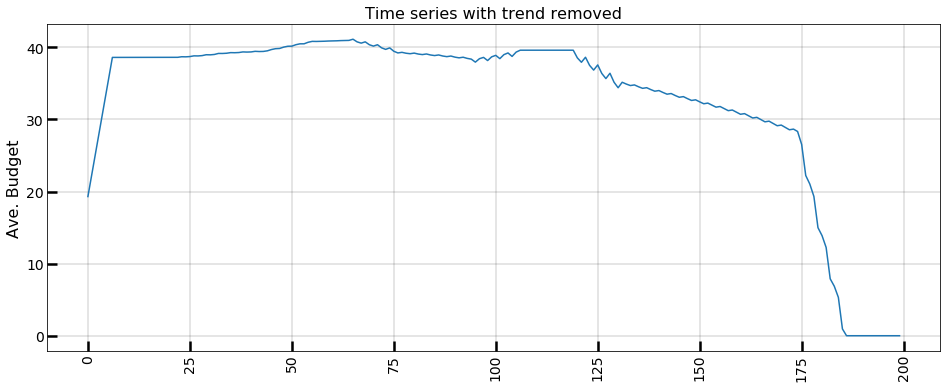

In [230]:
plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t[0:time_series.shape[1]],time_series[0])
#plt.xticks(ticks=t[0:time_series.shape[1]], rotation='vertical');
#plt.tick_params(direction='in', length=10, width=2.5, colors='k',
#                           grid_color='k', grid_alpha=1, labelsize=8)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)

plt.figure(figsize=(16,6))
plt.cla()
plt.plot(t[0:mov_avg.shape[1]], mov_avg[0] )
plt.xticks(rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=14)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)

In [231]:
peaks=scipy.signal.find_peaks(time_series[0])
peaks=peaks[0]

flags=[]
for i in range(1,len(peaks)):
    if ( (peaks[i]-peaks[i-1])/period >= 2 ):
        flags.append(i-1)
if (time_series.shape[1]-peaks[-1])/period >= 2:
    flags.append(peaks[-1])

In [232]:
flags

[25, 178]

In [233]:
peaks

array([ 25,  28,  31,  34,  37,  40,  43,  46,  49,  52,  55,  58,  61,
        64,  67,  70,  73,  76,  79,  82,  85,  88,  91,  94,  97, 100,
       124, 127, 130, 133, 136, 139, 142, 145, 148, 151, 154, 157, 160,
       163, 166, 169, 172, 175, 178], dtype=int64)

In [234]:
amp=[]
for peak in peaks:
    amp.append(time_series[0][peak])

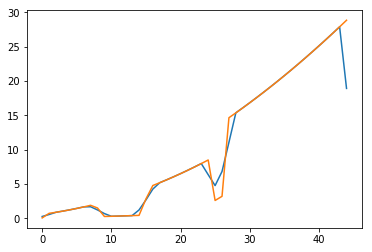

In [235]:
plt.plot(range(0,len(amp)), ma(np.array(amp).reshape(1,-1), window=3)[0] )
plt.plot(range(0,len(amp)), amp )

In [123]:
new_series=ma(time_series,window=3)
new_series=new_series.reshape(1,-1)
new_series.shape

(1, 174)

Text(0.5, 1.0, 'Time series with trend removed')

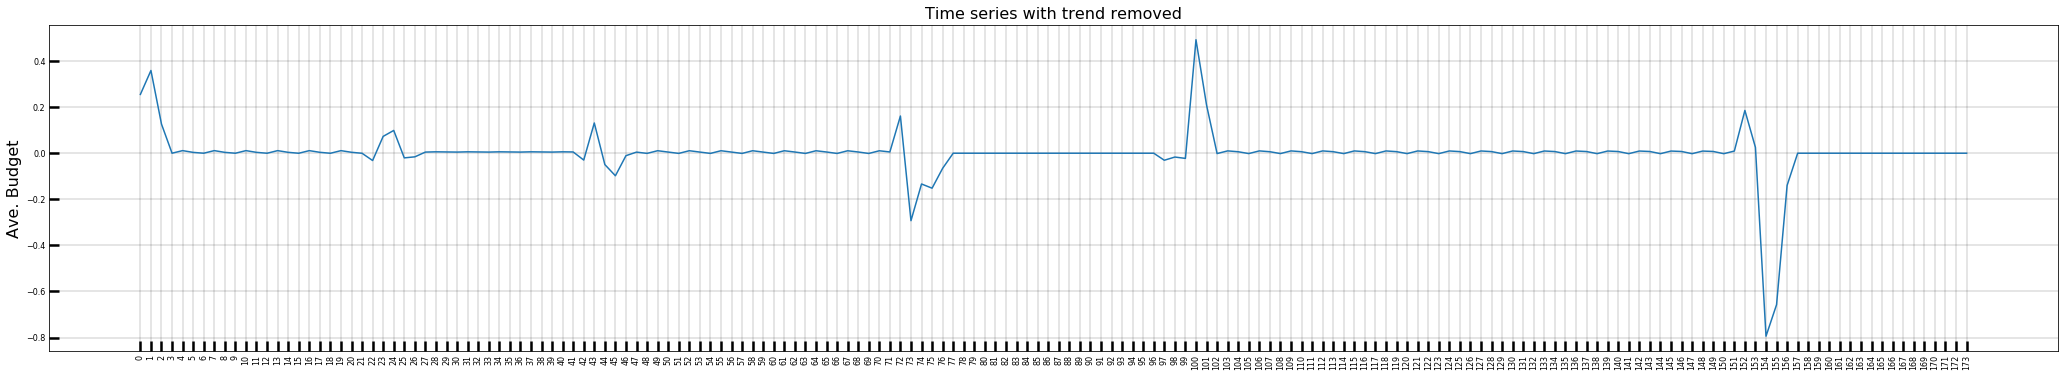

In [124]:
plt.figure(figsize=(36,6))
plt.cla()
plt.plot(t[0:new_series.shape[1]],new_series[0])
plt.xticks(ticks=t[0:time_series.shape[1]], rotation='vertical');
plt.tick_params(direction='in', length=10, width=2.5, colors='k',
                           grid_color='k', grid_alpha=1, labelsize=8)
plt.grid(b=True, linewidth=0.2)
plt.ylabel('Ave. Budget', fontsize=16)
plt.title('Time series with trend removed', fontsize=16)